In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set()

In [2]:
data = pd.read_excel("hw_7_data.xlsx").rename(columns={"Unnamed: 0": "Date"}).set_index("Date")
data.head(5)

,SPY US Equity,AAPL US Equity,CL1 Comdty,DXY Curncy,HFRIMTI Index,Rate Convexity,Portfolio,10-yr Yields,Dvd-Price Ratio
Date,,,,,,,,,
1999-10-31,0.064078,0.265523,-0.112607,0.005277,0.0235,0.025013,0.000072,0.06024,0.010868
1999-11-30,0.016651,0.221519,0.130575,0.029578,0.0250,0.027722,0.105636,0.06191,0.010690
1999-12-31,0.057089,0.050465,0.041074,-0.001177,0.0509,0.040543,0.042261,0.06442,0.009465
2000-01-31,-0.049787,0.009123,0.079687,0.032002,0.0155,0.034617,0.031966,0.06665,0.009961
2000-02-29,-0.015226,0.104820,0.100941,0.007515,0.0596,-0.038410,0.063138,0.06409,0.010792


In [3]:
returns = data.iloc[:,:6].copy()
returns.head(5)

,SPY US Equity,AAPL US Equity,CL1 Comdty,DXY Curncy,HFRIMTI Index,Rate Convexity
Date,,,,,,
1999-10-31,0.064078,0.265523,-0.112607,0.005277,0.0235,0.025013
1999-11-30,0.016651,0.221519,0.130575,0.029578,0.0250,0.027722
1999-12-31,0.057089,0.050465,0.041074,-0.001177,0.0509,0.040543
2000-01-31,-0.049787,0.009123,0.079687,0.032002,0.0155,0.034617
2000-02-29,-0.015226,0.104820,0.100941,0.007515,0.0596,-0.038410


# 1. Summary Statistics

## 1.1 & 1.2

In [4]:
stats_simple = pd.DataFrame(columns=returns.columns, index=["Mean", "Std", "Max", "Min", "Corr with Portfolio"])
for c in stats_simple.columns:
    stats_simple[c] = [returns[c].mean(), returns[c].std(), returns[c].max(), returns[c].min(), returns[c].corr(data['Portfolio'])]
stats_simple

,SPY US Equity,AAPL US Equity,CL1 Comdty,DXY Curncy,HFRIMTI Index,Rate Convexity
Mean,0.005874,0.027127,0.007726,0.000280,0.004934,-0.002046
Std,0.041997,0.117972,0.092340,0.023040,0.022255,0.085533
Max,0.109147,0.453741,0.297144,0.077850,0.064902,0.304245
Min,-0.165186,-0.577435,-0.326212,-0.062236,-0.063616,-0.261321
Corr with Portfolio,0.550387,0.584935,0.910560,-0.288421,0.155916,0.310357


## 1.3

Not necessarily. For a univariate regression, beta is proportional to pairwise correlation. But in a multivariate regression, the beta is not so closely connected to the pairwise correlation. This means that a regressor with a large positive correlation to "y" could actually have a small, or even negative beta.

## 1.4

In [5]:
returns_log = np.log(1 + returns)
stats_log = pd.DataFrame(columns=returns_log.columns, index=["Mean", "Std", "Max", "Min", "Corr with Portfolio"])
for c in stats_log.columns:
    stats_log[c] = [returns_log[c].mean(), returns_log[c].std(), returns_log[c].max(), returns_log[c].min(), returns_log[c].corr(data['Portfolio'])]
stats_log

,SPY US Equity,AAPL US Equity,CL1 Comdty,DXY Curncy,HFRIMTI Index,Rate Convexity
Mean,0.004972,0.019504,0.003389,0.000016,0.004679,-0.005725
Std,0.042372,0.124917,0.093840,0.023011,0.022119,0.086208
Max,0.103591,0.374140,0.260165,0.074968,0.062883,0.265625
Min,-0.180547,-0.861411,-0.394840,-0.064256,-0.065729,-0.302891
Corr with Portfolio,0.552450,0.571211,0.910968,-0.286503,0.156504,0.323450


Means of log returns are smaller than the means of simple (arithmetic) returns. This is because of Jensen's inequality--also known as a convexity adjustment.

## 1.5 

In [6]:
returns_annu = returns.resample("Y").apply(lambda x: ((1+x).cumprod() - 1).iat[-1])
stats_acutal_annu = pd.DataFrame(columns=returns_annu.columns, index=["Mean", "Std"])
for c in stats_acutal_annu.columns:
    stats_acutal_annu[c] = [returns_annu[c].mean(), returns_annu[c].std()]
stats_acutal_annu

,SPY US Equity,AAPL US Equity,CL1 Comdty,DXY Curncy,HFRIMTI Index,Rate Convexity
Mean,0.072733,0.412179,0.095922,0.003285,0.057467,-0.020214
Std,0.169250,0.662357,0.344594,0.080064,0.078448,0.309443


In [7]:
stats_scaled_annu = stats_simple.iloc[:2, :].copy()
stats_scaled_annu.loc["Mean",:] = stats_scaled_annu.loc["Mean",:] * 12
stats_scaled_annu.loc["Std",:] = stats_scaled_annu.loc["Std",:] * np.sqrt(12)
stats_scaled_annu

,SPY US Equity,AAPL US Equity,CL1 Comdty,DXY Curncy,HFRIMTI Index,Rate Convexity
Mean,0.070489,0.325522,0.092711,0.003357,0.059213,-0.024558
Std,0.145482,0.408666,0.319874,0.079813,0.077093,0.296297


The annualized statistics of monthly returns are close to the statistics of annual returns. However, they are not exact because the annualizing factors (12 and sqrt(12)) are approximations, so in any given sample there will be some difference between compounding stats or annualizing returns and then taking the stats.

## 1.6 

<!-- <font color='red'>  -->
All comparing to the result of using simple return:
- return factors: this will change the intercept, but keep the same beta, since we are simply shifting the levels of the variables, not the covariations.
- log returns: again, the level will be slightly different, (as seen above in the slighly smaller means,) which will change the intercept. The betas will change only slightly, as the log adjustment has very small impact on the returns, and thus their covariations.
- annual returns: this will change the intercept substantially because the scale of the data is different. It will also change the betas--and it may change them substantially--since the compound returns can differ substantially from the original returns.
<!-- </font> -->

# 2. Regression

## 2.1

In [8]:
X = sm.add_constant(returns['SPY US Equity'])
y = data['Portfolio']
model1 = sm.OLS(y, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Portfolio   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     103.0
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           2.50e-20
Time:                        00:16:01   Log-Likelihood:                 387.05
No. Observations:                 239   AIC:                            -770.1
Df Residuals:                     237   BIC:                            -763.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0050      0.003      1.592      0.113      -0.001       0.011
SPY US Equity     0.7536      0.074     10.149      0.000       0.607       0.900
==============================================================================
Omnibus:                        3.225   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.199   Jarque-Bera (JB):                2.854
Skew:                          -0.231   Prob(JB):                        0.240
Kurtosis:                       3.272   Cond. No.                         23.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2.2

In [9]:
X = sm.add_constant(returns[['SPY US Equity', 'CL1 Comdty']])
y = data['Portfolio']
model2 = sm.OLS(y, X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Portfolio   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1482.
Date:                Tue, 13 Jul 2021   Prob (F-statistic):          2.55e-134
Time:                        00:16:01   Log-Likelihood:                 655.45
No. Observations:                 239   AIC:                            -1305.
Df Residuals:                     236   BIC:                            -1294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0029      0.001      2.798      0.006       0.001       0.005
SPY US Equity     0.4439      0.025     17.627      0.000       0.394       0.493
CL1 Comdty        0.5115      0.011     44.656      0.000       0.489       0.534
==============================================================================
Omnibus:                       27.735   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.835
Skew:                          -0.365   Prob(JB):                     3.45e-22
Kurtosis:                       6.064   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notice that the beta on SPY is much lower now that we include CL1. Also note that the R-squared is much higher.

## 2.3

In [10]:
fitted_ts = model2.params[0] + model2.params[1] * returns['SPY US Equity'] + model2.params[2] * returns['CL1 Comdty']
corr = fitted_ts.corr(data['Portfolio'])
corr, corr**2

(0.9624107616253494, 0.9262344740922852)

The squared correlation is exactly the R^2, as R^2 captures the correlation of Portfolio's return and the combined space spanned by both regressors.

## 2.4

In [11]:
corr = returns['CL1 Comdty'].corr(returns['SPY US Equity'])
corr

0.2754456042254609

The beta in (2) is much smaller than in (1). This is because Oil and SPY is significantly correlated, therefore a large proportion of the variation in the Portfolio return which was being attributed to SPY (in eq 1) was actually better explained by Oil. Thus, in eq (2) this gets attributed more directly to Oil, and less is attributed to SPY.

## 2.5

Without doing calculation, the intuition is the residual in model 1 would be highly correlated with the Oil return. This is because in model 2, we see that the Oil beta is significant (t ratio equals to 44.656), which means Oil returns can explain a big portion of the Portfolio return. In other words, the residual in model 1 containes the information which should be explained by the Oil returns, and therefore has a higher correlation.

In [12]:
returns['CL1 Comdty'].corr(model1.resid)

0.9090306838982621

In [13]:
returns['CL1 Comdty'].corr(model2.resid)

-6.846186638780074e-16

# 3. Decomposing and Replicating

## 3.1

In [14]:
X = returns.copy()
y = data['Portfolio']
model3 = sm.OLS(y, X).fit()
weights = model3.params
weights

SPY US Equity     2.500000e-01
AAPL US Equity    1.500000e-01
CL1 Comdty        5.000000e-01
DXY Curncy        1.000000e-01
HFRIMTI Index    -2.827599e-16
Rate Convexity   -4.857226e-17
dtype: float64

## 3.2

In [15]:
subset = data.loc[:"2018"].copy()
returns_subset = subset.iloc[:,[0,2,3,4,5]].copy()
returns_subset.head(5)

,SPY US Equity,CL1 Comdty,DXY Curncy,HFRIMTI Index,Rate Convexity
Date,,,,,
1999-10-31,0.064078,-0.112607,0.005277,0.0235,0.025013
1999-11-30,0.016651,0.130575,0.029578,0.0250,0.027722
1999-12-31,0.057089,0.041074,-0.001177,0.0509,0.040543
2000-01-31,-0.049787,0.079687,0.032002,0.0155,0.034617
2000-02-29,-0.015226,0.100941,0.007515,0.0596,-0.038410


In [16]:
X = returns_subset
y = subset['AAPL US Equity']
model4 = sm.OLS(y, X).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         AAPL US Equity   R-squared (uncentered):                   0.343
Model:                            OLS   Adj. R-squared (uncentered):              0.329
Method:                 Least Squares   F-statistic:                              23.63
Date:                Tue, 13 Jul 2021   Prob (F-statistic):                    4.37e-19
Time:                        00:16:02   Log-Likelihood:                          206.97
No. Observations:                 231   AIC:                                     -403.9
Df Residuals:                     226   BIC:                                     -386.7
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
SPY US Equity      1.5349      0.185      8.285      0.000       1.170       1.900
CL1 Comdty         0.2297      0.079      2.892      0.004       0.073       0.386
DXY Curncy         1.1449      0.320      3.576      0.000       0.514       1.776
HFRIMTI Index      0.7743      0.311      2.487      0.014       0.161       1.388
Rate Convexity    -0.0979      0.089     -1.096      0.274      -0.274       0.078
==============================================================================
Omnibus:                       32.610   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.489
Skew:                          -0.446   Prob(JB):                     4.62e-29
Kurtosis:                       6.572   Cond. No.                         5.20
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

All returns except "Rate Convexity" has absolute t-ratio greater than 2.

Note that while we can estimate an R-squared, it doesn't make much sense in a regression without an intercept. (It does not need to be between 0 and 1.) This Python package does a good job reminding users of that fact.

## 3.3

In [17]:
fitted_ts = (model4.params * returns.loc["2019", ["SPY US Equity", "CL1 Comdty", "DXY Curncy", "HFRIMTI Index", "Rate Convexity"]]).sum(axis=1)
fitted_ts.corr(returns.loc["2019","AAPL US Equity"])

0.9133321873785296

This is much higher than the in-sample R^2 above.

This is likely due to luck in small samples. Typically we expect to see much lower fit out-of-sample.

# 4. Heteroskedasticity & Serial Correlation

## 4.1

In [18]:
X = sm.add_constant(data[["10-yr Yields", "Dvd-Price Ratio"]])
y = data["SPY US Equity"]
model5 = sm.OLS(y, X).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SPY US Equity   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     4.465
Date:                Tue, 13 Jul 2021   Prob (F-statistic):             0.0125
Time:                        00:16:02   Log-Likelihood:                 423.48
No. Observations:                 239   AIC:                            -841.0
Df Residuals:                     236   BIC:                            -830.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0741      0.023      3.191      0.002       0.028       0.120
10-yr Yields       -0.7707      0.280     -2.754      0.006      -1.322      -0.219
Dvd-Price Ratio    -2.2646      0.849     -2.669      0.008      -3.936      -0.593
==============================================================================
Omnibus:                        6.566   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                6.427
Skew:                          -0.333   Prob(JB):                       0.0402
Kurtosis:                       3.448   Cond. No.                         325.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With t-ratios of -2.754 and -2.669, both regressors are statistically significant.

## 4.2

In [19]:
model5.resid.corr(model5.resid.shift(1))

0.05089259162593064

The correlation is roughly 5%, which is not a large correlation.

## 4.3

In [20]:
y = model5.resid
model6 = sm.OLS(y**2, X).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     8.172
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           0.000370
Time:                        00:16:02   Log-Likelihood:                 1087.1
No. Observations:                 239   AIC:                            -2168.
Df Residuals:                     236   BIC:                            -2158.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0041      0.001     -2.840      0.005      -0.007      -0.001
10-yr Yields        0.0586      0.017      3.367      0.001       0.024       0.093
Dvd-Price Ratio     0.2053      0.053      3.887      0.000       0.101       0.309
==============================================================================
Omnibus:                      150.121   Durbin-Watson:                   1.572
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1029.503
Skew:                           2.511   Prob(JB):                    2.79e-224
Kurtosis:                      11.841   Cond. No.                         325.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
lm, pval, _, _ = sm.stats.diagnostic.het_white(model5.resid,X)
print(f'White-test for Heteroskedasticity p-value is {pval:.4f}')

White-test for Heteroskedasticity p-value is 0.0003


In [22]:
X = sm.add_constant(data[["10-yr Yields", "Dvd-Price Ratio"]])
y = data["SPY US Equity"]
model_robust = sm.OLS(y, X).fit(cov_type = 'HC0')
model_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SPY US Equity   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     3.183
Date:                Tue, 13 Jul 2021   Prob (F-statistic):             0.0433
Time:                        00:16:02   Log-Likelihood:                 423.48
No. Observations:                 239   AIC:                            -841.0
Df Residuals:                     236   BIC:                            -830.5
Df Model:                           2                                         
Covariance Type:                  HC0                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0741      0.030      2.461      0.014       0.015       0.133
10-yr Yields       -0.7707      0.305     -2.523      0.012      -1.370      -0.172
Dvd-Price Ratio    -2.2646      1.202     -1.885      0.059      -4.620       0.090
==============================================================================
Omnibus:                        6.566   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                6.427
Skew:                          -0.333   Prob(JB):                       0.0402
Kurtosis:                       3.448   Cond. No.                         325.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

## 4.4

- 4.2 checked the lag-1 autocorrelation, which indicates there is no significant serial correlation in the sample residuals. While that does not guarantee whether there is serial correlation in the population residuals, we take it as evidence that it is not a big concern.

- 4.3 checked heteroskedasticity. If there were strong heteroskedasticity in the residuals, it means that the residuals vary over time, and potentially with variation in X. If the betas are significant, we have heteroskedasticity. If they are not significant, then we may still have heteroskedasticy, but not explained by the regressors squared. In the regression above, we see the sample residuals squared vary significantly with SPY, which is evidence that the residual variance changes, and thus evidence that the data is heteroskedastic.

## 4.5

Above, we see a Durbin-Watson statistic reported in the regression of eqution (5), in 4.1. The Durbin-Watson stat is telling us whether there is statistically significant serial correlation. The null hypothesis is that the DW stat = 2 if no serial correlation. Our DW stat is very near 2, and not statistically significant--meaning we do not have evidence to reject the null of NO serial correlation.

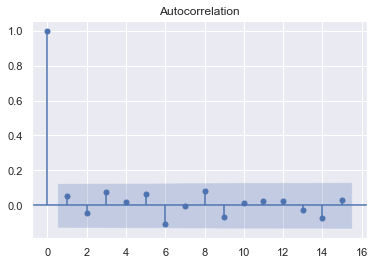

In [23]:
plot_acf(model5.resid, lags=15)
plt.show()

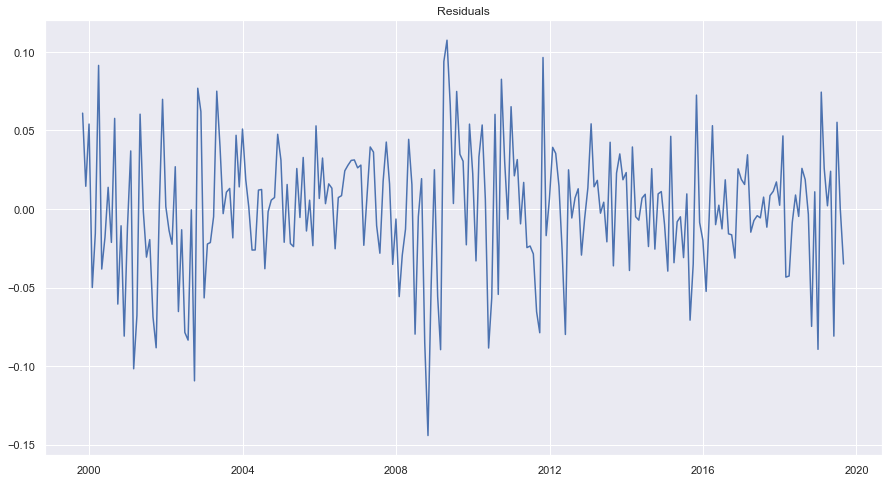

In [24]:
figure(figsize=(15, 8))
plt.plot(model5.resid)
plt.title("Residuals")
plt.show()

The ACF plot confirms that there is no significant autocorrelation within 15 lags. The residuals plot shows the residual is reasonably homoskedastic.